
# 1. Load the housing data and randomly split it into training and test subsets



In [0]:

import pandas as pd
from sklearn.datasets import load_boston


# Loading dataset to Pandas DataFrame and getting basic info about the data 

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


def display_data_info(data):
    
    display(data.info())
    display(data.head())

    print('Missing valuses columns:')
    display(data.columns[data.isnull().any()])
    
    print('Number of missing values:')
    display(data.apply(lambda x: x.isnull().sum( axis=0)))


# Checking validity of data - All OK 
display_data_info(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Missing valuses columns:


Index([], dtype='object')

Number of missing values:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# 1. Randomly split it into training and test subsets
(use 70% of the data for training and 30% for test). You can use the
train test split in sklearn to do that. Fixing the random state will
ensure you get the same splits every time you run your code.
# 2. Normalize the features to bring them on a similar scale.


In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Normalizing the data between 0 and 1 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = X.columns)

# Checking normalization
display(X.head(5))

# Splitting into test/train
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1234)  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


# 3. Create a linear regression model. Experiment with 5 values for the learning rates.
The model should have one layer, the output layer with one linear unit, and should take as input instances x
representing houses. Use a separate validation set to tune the learning rate
and the number of iterations. The validation set can be created when t-
ting the model, e.g. model.fit(X train, y train, epochs=100, X val
= 0.2). 

# 4. Plot learning curves that show the variation of performance 
(i.e., meansquared error) with the number of iterations for both training and valida-
tions sets for the 5 values of the learning rate that you used.

# What learning rate gave the best results?
**For evaluating acccuracy of the model given learning rate a I chose minimum of the last acchieved score during fitting part. From my choice of LRs - the best score was achieved with LR set to 0.05**

# How many iterations are needed for convergence?
**From the graphs we can see, for higher lr the curve is not so smooth, because of the long jumps, but still all of them stops improving around 400th epoch.**

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model with lr of (0.1) (on validation data) has MSE of: 49.31800079345703
Model with lr of (0.05) (on validation data) has MSE of: 52.121429443359375
Model with lr of (0.01) (on validation data) has MSE of: 55.98072052001953
Model with lr of (0.005) (on validation data) has MSE of: 58.68421936035156
Model with lr of (0.001) (on validation data) has MSE of: 75.6727066040039
MSE  0.001 (test): 47.08410734267468


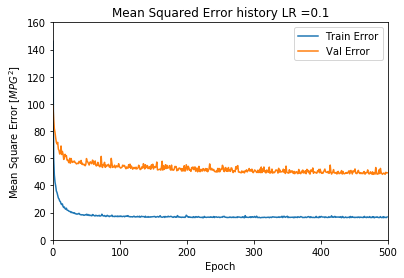

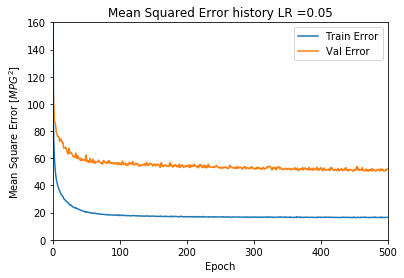

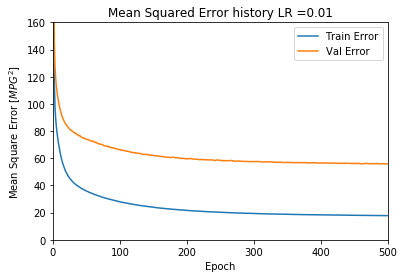

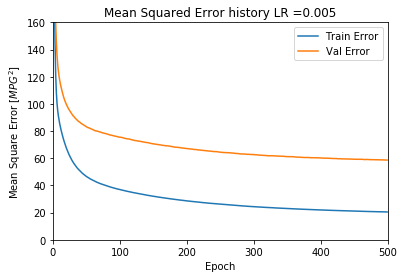

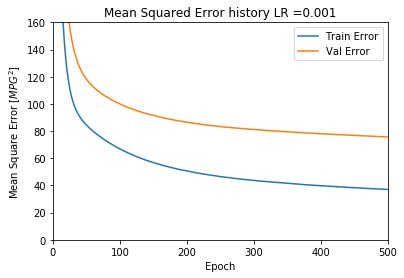

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn import metrics

'''
Code is inspired by an example in:
https://www.tensorflow.org/tutorials/keras/basic_regression
'''

LR = 0.001
EPOCHS = 500
def build_model(lr=LR, train_dataset=X):
    model = keras.Sequential([
        layers.Dense(units=1, use_bias=True, input_shape=[len(train_dataset.keys())])
      ])


    optimizer = tf.keras.optimizers.SGD(lr)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_squared_error'])
    return model



def plot_history(history, lr=LR):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.title(f"Mean Squared Error history LR ={lr}")
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.xlim([0,EPOCHS])
    plt.ylim([0,160])
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()


# For evaluating acccuracy of the model given learning rate a I chose minimum of the last acchieved score during fitting part 
# From my choice of LRs - the best score was achieved with LR set to 0.05
lr_list = [0.1, 0.05, 0.01, 0.005, 0.001]
for lr in lr_list:
    model = build_model(lr)
    lr_history = model.fit(Xtrain, ytrain, epochs=EPOCHS, validation_split = 0.2, verbose=0)

    plot_history(lr_history, lr=lr)
    mse = lr_history.history['val_mean_squared_error'][-1]
    print(f'Model with lr of ({lr}) (on validation data) has MSE of: {mse}')
    


print(f'MSE  {lr} (test): {metrics.mean_squared_error(ytest, model.predict(Xtest))}')    



The lowest error was achived with learning rate value of 0.05 

# 5. Use the best model identified based on the validation data and run it on the test data.
    
# 6. Compare the performance on the training data with performance on the validation data and also performance on the test data. 



In [0]:
import numpy as np


lr = 0.05 # lr with the lowest error 

model = build_model(lr)

# Retrain model on best LR
lr_history = model.fit(Xtrain, ytrain, epochs=EPOCHS, validation_split = 0.2, verbose=0)

# Evaluate on test data
results = model.evaluate(Xtest, ytest, verbose=False)


mse = lr_history.history['mean_squared_error'][-1]
mse_val = lr_history.history['val_mean_squared_error'][-1]
mse_test = results[1]
print(f'Model with lr of ({lr}) (on TRAIN data) has error for')
print(f'\t Train Data         {mse}')
print(f'\t Validation Data    {mse_val}')
print(f'\t Test Data          {mse_test}')





Model with lr of (0.05) (on TRAIN data) has error for
	 Train Data         16.509037017822266
	 Validation Data    51.501739501953125
	 Test Data          21.512218475341797


# What features contribute the most to the price prediction?

Most important features:
	1.	 RM
	2.	 LSTAT
	3.	 DIS
	4.	 PTRATIO
	5.	 NOX
	6.	 TAX
	7.	 B
	8.	 RAD
	9.	 ZN
	10.	 CHAS
	11.	 CRIM
	12.	 INDUS
	13.	 AGE


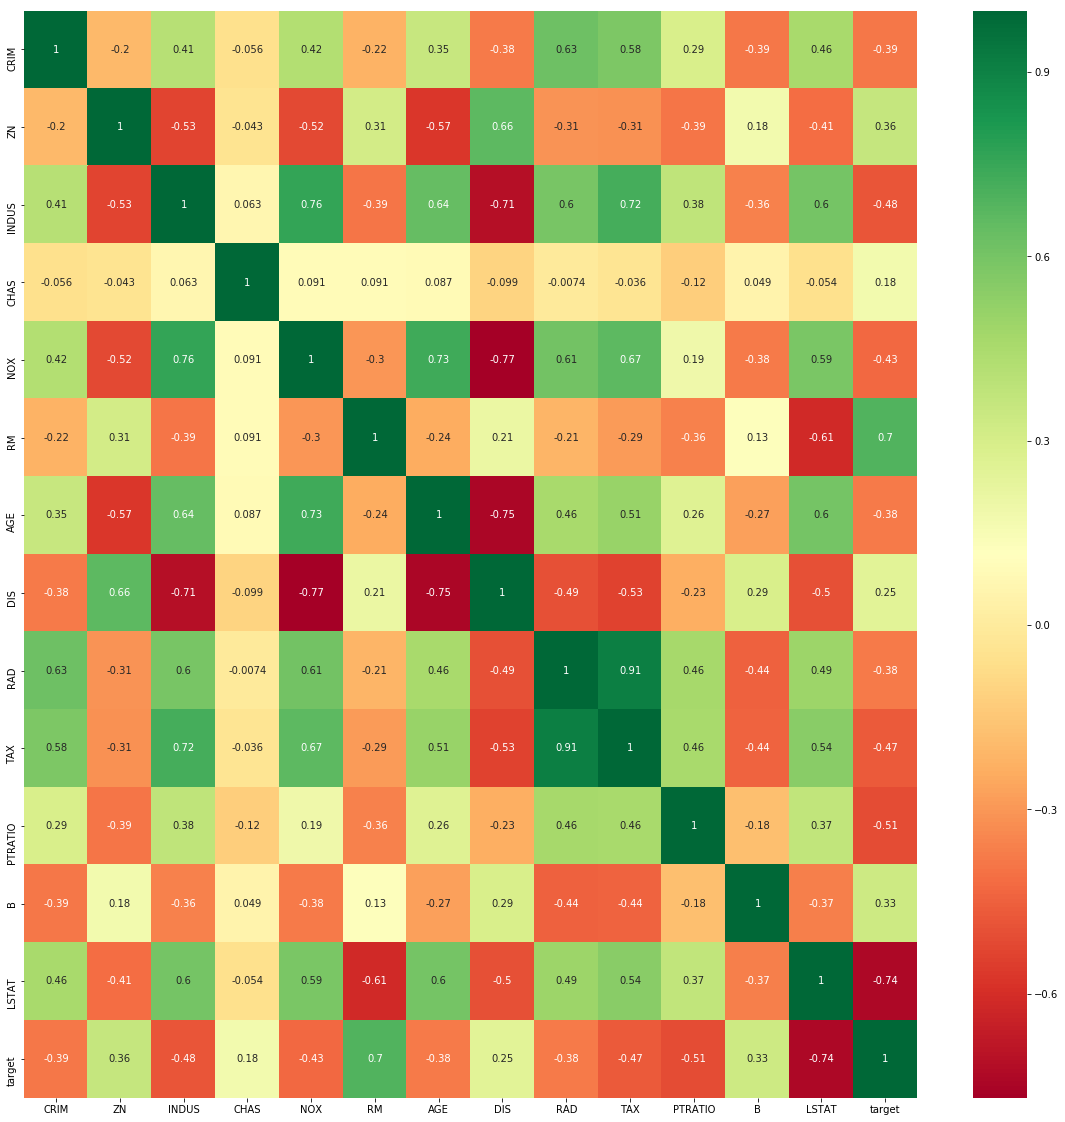

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns



# Showing most impotant features, for the model by examining the strongness of the weights connected to the feature.
# This is suported by corellation table shown below 

weights = np.array([abs(x) for x in model.layers[0].get_weights()[0].flatten()])

print("Most important features:")

for i, index in enumerate(weights.argsort()[::-1]):
    print(f"\t{i+1}.\t {X.columns[index]}")


# Getting full datatable
houses_df = X.copy()
houses_df['target'] = y

# Get correlations of each features in dataset
corrmat = houses_df.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(houses_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")